In [ ]:
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/resume_projects/credit_card/creditcard.csv")

In [ ]:
print(data.head(10))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [ ]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/Total_transactions*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


In [ ]:
data.info()

In [ ]:
print(data["Amount"].max())
print(data["Amount"].min())

25691.16
0.0


In [ ]:
data.drop(['Time'], axis=1, inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, shuffle=False, stratify = None)

In [ ]:
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=(0.15/0.85), shuffle=False, stratify = None)

XGBOOST

In [ ]:
def run_cross_validation_on_trees( tree_depths, train_X,train_Y,val_X,val_Y):
    accuracy_val=[]
    accuracy_train=[]
    for depth in tree_depths:
        tree_model = XGBClassifier(max_depth=depth)
        tree_model.fit(train_X, train_Y)
        dt_yhat = tree_model.predict(val_X)
       
        accuracy_val.append(f1_score(val_Y, dt_yhat))
        dt_yhat_train = tree_model.predict(train_X)
        accuracy_train.append(f1_score(train_Y, dt_yhat_train))
    
    return accuracy_val,accuracy_train

In [ ]:
tree_depths = range(1,25)
accuracy_val,accuracy_train=run_cross_validation_on_trees( tree_depths, X_train,y_train,X_val,y_val)

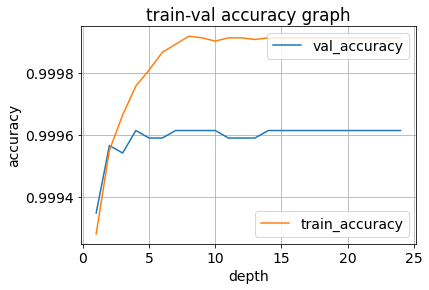

In [ ]:
x_axis= [i for i in range(1,25)]
line1,=plt.plot(x_axis,accuracy_val,label='val_accuracy')
# plt.legend(handles=[line1], loc='upper right')
first_legend = plt.legend(handles=[line1], loc='upper right')
plt.gca().add_artist(first_legend)
line2, = plt.plot(x_axis,accuracy_train,label='train_accuracy')
plt.legend(handles=[line2], loc='lower right')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('train-val accuracy graph')
plt.show()

In [ ]:
best_k=4

In [ ]:
tree_model = XGBClassifier(max_depth=best_k,criterion = 'entropy')
tree_model.fit(X_train,y_train)
dt_yhat = tree_model.predict( X_test)
acc=accuracy_score(y_test, dt_yhat)
f1=f1_score(y_test, dt_yhat)
c=confusion_matrix(y_test, dt_yhat, labels = [0, 1])
print("accuracy is ",acc)
print("f1 score is ",f1)
print("confusion matrix",c)

accuracy is  0.999540507859734
f1 score is  0.7956989247311829
confusion matrix [[41294     4]
 [   15    37]]


SVM


In [ ]:
def run_cross_validation_on_SVM( kernals, train_X,train_Y,val_X,val_Y):
    accuracy_val=[]
    accuracy_train=[]
    for k in kernals:
        svm = SVC(kernel=k)
        svm.fit(train_X, train_Y)
        svm_yhat = svm.predict(val_X)
        accuracy_val.append(accuracy_score(val_Y, svm_yhat))
        svm_yhat_train = svm.predict(train_X)
        accuracy_train.append(accuracy_score(train_Y, svm_yhat_train))
    
    return accuracy_val,accuracy_train

In [ ]:
kernals = ('linear', 'poly', 'rbf')
accuracy_val,accuracy_train=run_cross_validation_on_SVM( kernals, X_train,y_train,X_val,y_val)

In [ ]:
print(accuracy_val)
print(accuracy_train)


[0.9995163240628778, 0.9987908101571947, 0.9986457073760581]
[0.9992744723081627, 0.9982017277923747, 0.998668138451413]


In [ ]:
best_kernal='rbf'

In [ ]:
svm = SVC(kernel=best_kernal)
svm.fit(X_train,y_train)
svm_yhat = svm.predict( X_test)
acc=accuracy_score(y_test, svm_yhat)
f1=f1_score(y_test, svm_yhat)
c=confusion_matrix(y_test, svm_yhat, labels = [0, 1])
print("accuracy is ",acc)
print("f1 score is ",f1)
print("confusion matrix",c)

accuracy is  0.9987424425634824
f1 score is  0.0
confusion matrix [[41298     0]
 [   52     0]]


In [ ]:
ctr=0
for i in svm_yhat:
  if i==0:
    ctr+=1
print(ctr)

41350


KNN

In [ ]:
def run_cross_validation_on_knn( k_list, train_X,train_Y,val_X,val_Y):
    accuracy_val=[]
    accuracy_train=[]
    for k in k_list:
        KNN = KNeighborsClassifier(n_neighbors = k)
        KNN.fit(train_X, train_Y)
        knn_yhat = KNN.predict(val_X)
        accuracy_val.append(accuracy_score(val_Y, knn_yhat))
        knn_yhat_train = KNN.predict(train_X)
        accuracy_train.append(accuracy_score(train_Y, knn_yhat_train))
    
    return accuracy_val,accuracy_train

In [ ]:
k_list = range()
accuracy_val,accuracy_train=run_cross_validation_on_trees( tree_depths, X_train,y_train,X_val,y_val)

In [ ]:
x_axis= [i for i in range(1,25)]
line1,=plt.plot(x_axis,accuracy_val,label='val_accuracy')
# plt.legend(handles=[line1], loc='upper right')
first_legend = plt.legend(handles=[line1], loc='upper right')
plt.gca().add_artist(first_legend)
line2, = plt.plot(x_axis,accuracy_train,label='train_accuracy')
plt.legend(handles=[line2], loc='lower right')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('train-val accuracy graph')
plt.show()

In [ ]:
best_k=4

In [ ]:
tree_model = XGBClassifier(max_depth=best_k,criterion = 'entropy')
tree_model.fit(X_train,y_train)
dt_yhat = tree_model.predict( X_test)
acc=accuracy_score(y_test, dt_yhat)
f1=f1_score(y_test, dt_yhat)
c=confusion_matrix(y_test, dt_yhat, labels = [0, 1])
print("accuracy is ",acc)
print("f1 score is ",f1)
print("confusion matrix",c)